# **A/B Testing on Marketing Campaign Performance**

## **Introduction**
A/B testing, also known as split testing, is a statistical method used to compare two variations of a marketing strategy to determine which one performs better. This technique helps businesses make data-driven decisions by evaluating the impact of different strategies on key performance metrics.

In this notebook, we analyze the effectiveness of a new marketing strategy by comparing its performance against an existing approach. Using data from two groups—**Control (existing strategy)** and **Test (new strategy)**—we assess whether the new strategy significantly improves user engagement and conversions.

## **Objective**
The goal of this A/B test is to determine whether the new marketing strategy results in:
- Higher **Click-Through Rate (CTR)**: The proportion of users who click on ads after seeing them.
- Higher **Conversion Rate (CVR)**: The proportion of users who make a purchase after clicking on an ad.

## **Methodology**
1. **Data Preprocessing**  
   - Load and clean the dataset.
   - Compute key metrics: CTR and CVR.
   - Handle missing values and normalize data if necessary.

2. **Exploratory Data Analysis (EDA)**  
   - Visualize the distribution of key metrics.
   - Identify any patterns or anomalies.

3. **Statistical Testing**  
   - Perform normality tests (Shapiro-Wilk).
   - Check variance equality (Levene’s test).
   - Select appropriate statistical tests (T-test or Mann-Whitney U test).
   - Compare CTR and CVR between the Control and Test groups.

4. **Interpretation of Results**  
   - Determine if the new strategy significantly improves performance.
   - Provide actionable insights for decision-making.

## **Expected Outcome**
If the new marketing strategy is effective, we expect to see statistically significant improvements in CTR and CVR. Otherwise, we may need to reconsider the approach and optimize other factors affecting conversions.

Let’s begin our analysis! 🚀


In [1]:
# %pip install -r ../requirements.txt

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind

# Set seaborn style and color palette
sns.set_style("darkgrid")  
sns.set_palette(sns.color_palette("Spectral"))

# Load the data
control_df = pd.read_csv('../data/transformed_control_group.csv') 
test_df = pd.read_csv('../data/transformed_test_group.csv')

# Check the data
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,0.523375,3.920773e+22,6.825282e+17,8.930086e+07,47.637440,23.471899,2.770031e+08,7738.999447
1,Control Campaign,2019-08-02,0.522843,7.646535e+22,1.598510e+18,1.017744e+08,46.247955,22.716070,1.697855e+08,6747.602812
2,Control Campaign,2019-08-03,0.523428,8.843742e+22,1.784856e+18,8.338224e+07,44.444596,21.908398,1.550253e+08,5323.752991
3,Control Campaign,2019-08-04,0.523051,3.126588e+22,7.601567e+17,4.068504e+07,38.848940,19.835123,1.635166e+08,4968.357585
4,Control Campaign,2019-08-06,0.523937,6.383639e+22,1.286677e+18,5.313895e+07,44.260509,20.918585,9.617205e+07,8981.492226


## Computing Key Metrics

- *Click-Through Rate (CTR) = Website Clicks / Impressions*
- *Conversion Rate (CVR) = Purchases / Website Clicks*



In [3]:
# Compute Click-Through Rate (CTR) and Conversion Rate (CVR)
control_df['CTR'] = control_df['# of Website Clicks'] / control_df['# of Impressions']
test_df['CTR'] = test_df['# of Website Clicks'] / test_df['# of Impressions']

control_df['CVR'] = control_df['# of Purchase'] / control_df['# of Website Clicks']
test_df['CVR'] = test_df['# of Purchase'] / test_df['# of Website Clicks']


In [4]:
# Shapiro-Wilk test for normality
ctr_control_shapiro = stats.shapiro(control_df['CTR'])
ctr_test_shapiro = stats.shapiro(test_df['CTR'])
cvr_control_shapiro = stats.shapiro(control_df['CVR'])
cvr_test_shapiro = stats.shapiro(test_df['CVR'])

In [5]:
# Levene’s test for equal variances
ctr_levene = stats.levene(control_df['CTR'], test_df['CTR'])
cvr_levene = stats.levene(control_df['CVR'], test_df['CVR'])

In [6]:
# A/B Tests
if ctr_control_shapiro.pvalue > 0.05 and ctr_test_shapiro.pvalue > 0.05:
    ctr_test = ttest_ind(control_df['CTR'], test_df['CTR'], equal_var=(ctr_levene.pvalue > 0.05))
else:
    ctr_test = mannwhitneyu(control_df['CTR'], test_df['CTR'])

if cvr_control_shapiro.pvalue > 0.05 and cvr_test_shapiro.pvalue > 0.05:
    cvr_test = ttest_ind(control_df['CVR'], test_df['CVR'], equal_var=(cvr_levene.pvalue > 0.05))
else:
    cvr_test = mannwhitneyu(control_df['CVR'], test_df['CVR'])


In [7]:
# Show results
{
    "CTR Shapiro-Wilk Test": {"Control p-value": ctr_control_shapiro.pvalue, "Test p-value": ctr_test_shapiro.pvalue},
    "CVR Shapiro-Wilk Test": {"Control p-value": cvr_control_shapiro.pvalue, "Test p-value": cvr_test_shapiro.pvalue},
    "CTR Levene Test p-value": ctr_levene.pvalue,
    "CVR Levene Test p-value": cvr_levene.pvalue,
    "CTR A/B Test p-value": ctr_test.pvalue,
    "CVR A/B Test p-value": cvr_test.pvalue
}

{'CTR Shapiro-Wilk Test': {'Control p-value': np.float64(0.016181050990447088),
  'Test p-value': np.float64(0.03987918935102048)},
 'CVR Shapiro-Wilk Test': {'Control p-value': np.float64(0.012665655205207564),
  'Test p-value': np.float64(0.029399058298963603)},
 'CTR Levene Test p-value': np.float64(4.853896989926149e-10),
 'CVR Levene Test p-value': np.float64(1.4909157928757068e-07),
 'CTR A/B Test p-value': np.float64(4.4617503416662335e-11),
 'CVR A/B Test p-value': np.float64(4.4617503416662335e-11)}

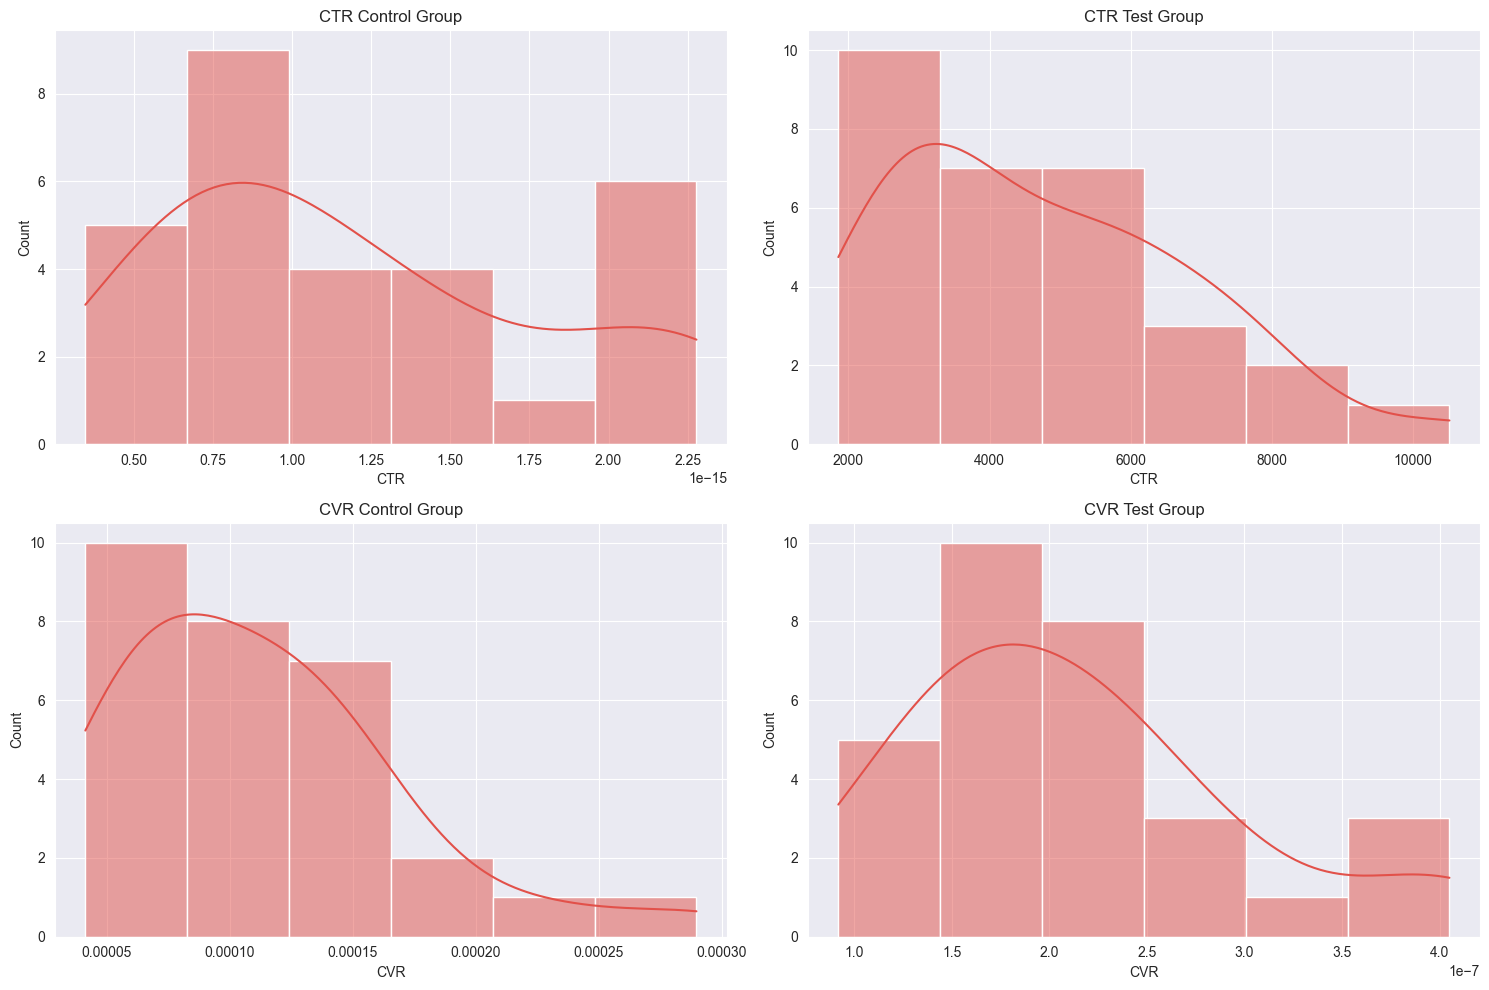

In [8]:
# CTR and CVR distributions
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(control_df['CTR'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('CTR Control Group')

sns.histplot(test_df['CTR'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('CTR Test Group')

sns.histplot(control_df['CVR'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('CVR Control Group')

sns.histplot(test_df['CVR'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('CVR Test Group')

plt.tight_layout()
plt.show()



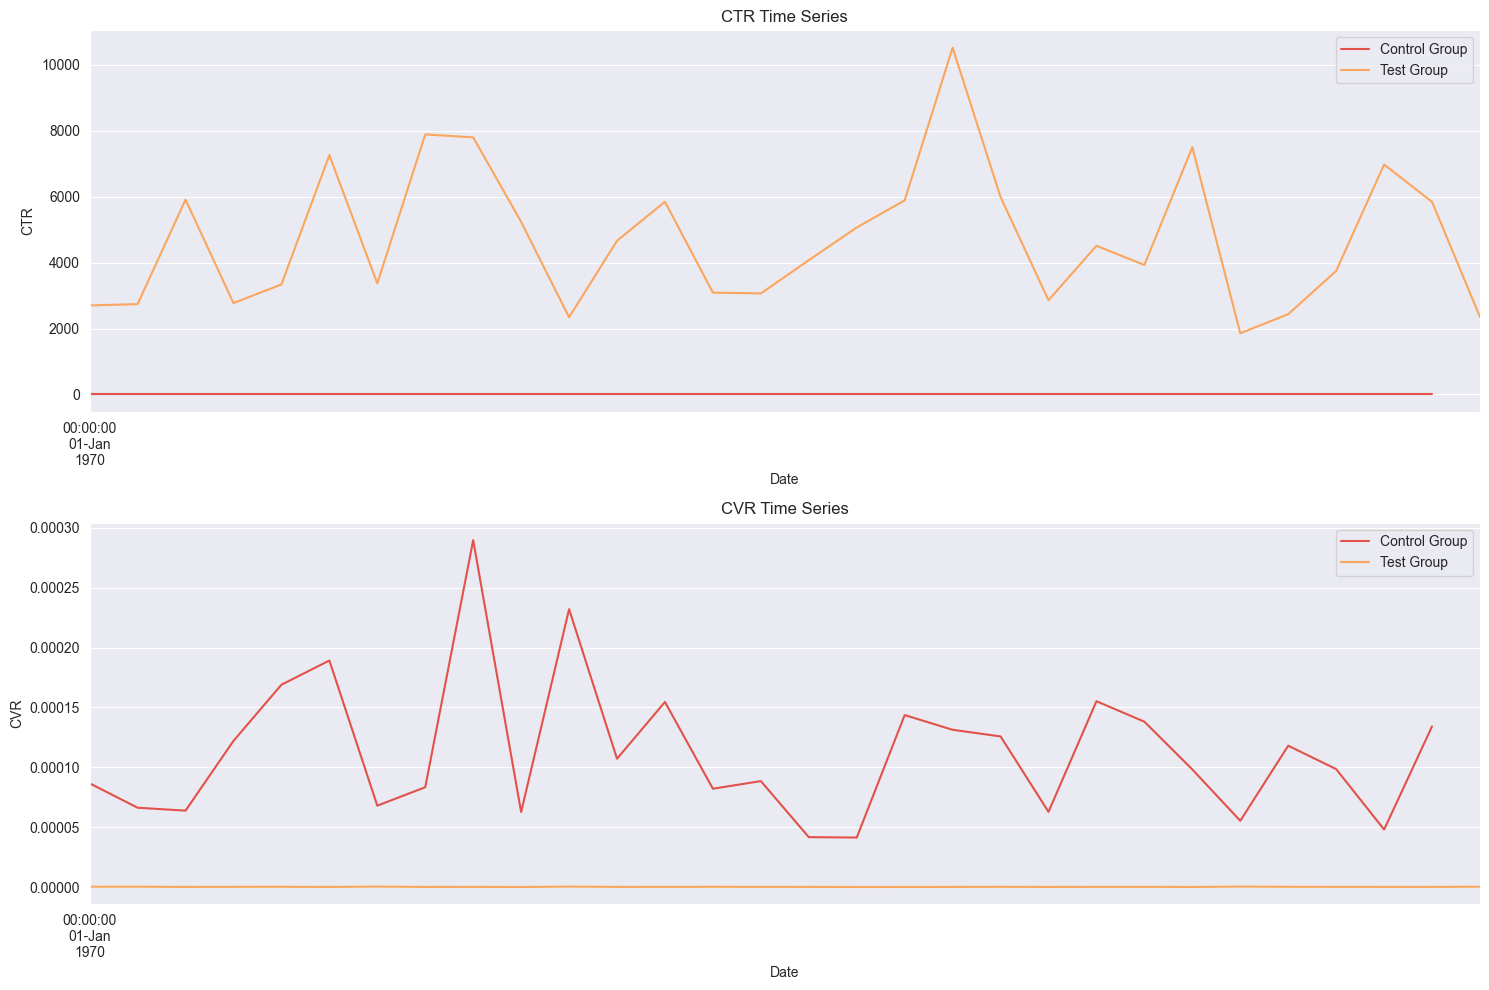

In [9]:
# Time Series Analysis
control_df.index = pd.to_datetime(control_df.index)
test_df.index = pd.to_datetime(test_df.index)

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

control_df['CTR'].plot(ax=axs[0], label='Control Group')
test_df['CTR'].plot(ax=axs[0], label='Test Group')
axs[0].set_title('CTR Time Series')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('CTR')
axs[0].legend()

control_df['CVR'].plot(ax=axs[1], label='Control Group')
test_df['CVR'].plot(ax=axs[1], label='Test Group')
axs[1].set_title('CVR Time Series')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('CVR')
axs[1].legend()

plt.tight_layout()
plt.show()


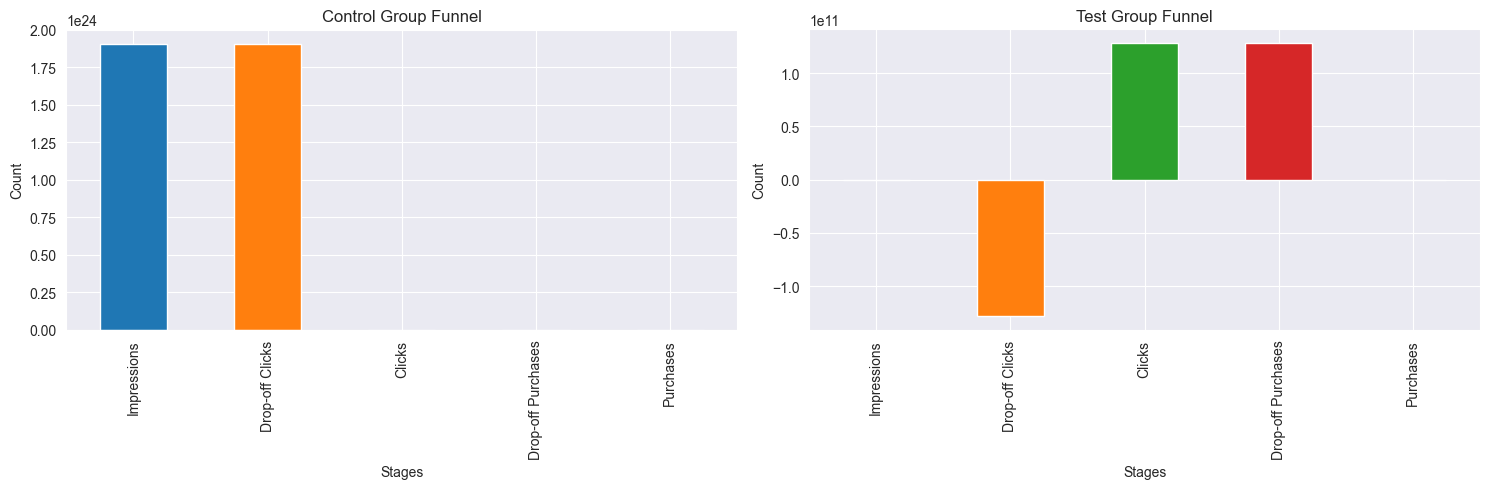

In [15]:
# Calculate the drop-off rates
control_df['Drop-off Clicks'] = control_df['Impressions'] - control_df['Clicks']
control_df['Drop-off Purchases'] = control_df['Clicks'] - control_df['Purchases']

test_df['Drop-off Clicks'] = test_df['Impressions'] - test_df['Clicks']
test_df['Drop-off Purchases'] = test_df['Clicks'] - test_df['Purchases']

# Plot the funnel
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

control_funnel = control_df[['Impressions', 'Drop-off Clicks', 'Clicks', 'Drop-off Purchases', 'Purchases']].sum()
test_funnel = test_df[['Impressions', 'Drop-off Clicks', 'Clicks', 'Drop-off Purchases', 'Purchases']].sum()

control_funnel.plot(kind='bar', stacked=True, ax=axs[0], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axs[0].set_title('Control Group Funnel')
axs[0].set_xlabel('Stages')
axs[0].set_ylabel('Count')

test_funnel.plot(kind='bar', stacked=True, ax=axs[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axs[1].set_title('Test Group Funnel')
axs[1].set_xlabel('Stages')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_25306/199528796.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_funnel['Date'] = pd.to_datetime(control_funnel['Date'])
/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_25306/199528796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_funnel['Date'] = pd.to_datetime(test_funnel['Date'])


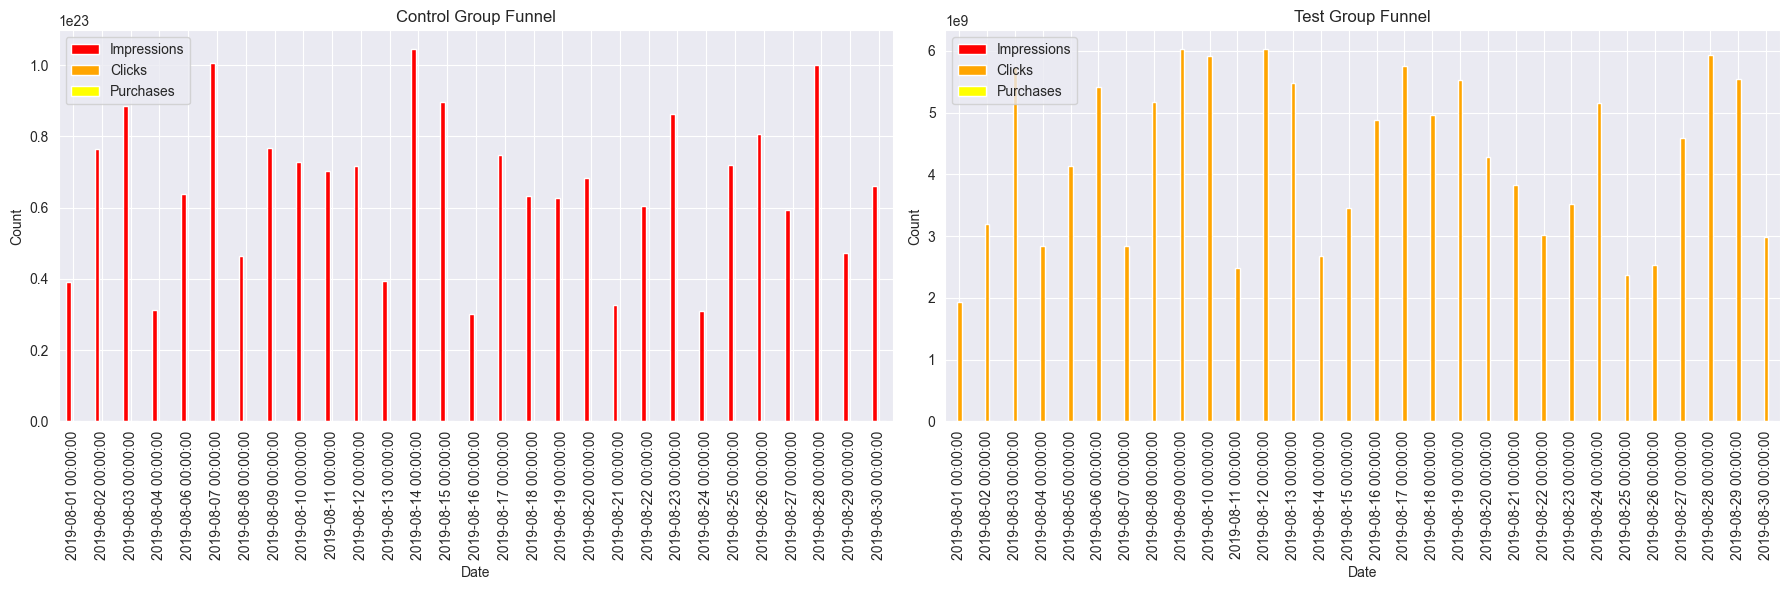

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming control_df and test_df are preloaded with the required columns

# Selecting relevant columns
control_funnel = control_df[['Date', '# of Impressions', '# of Website Clicks', '# of Purchase']]
test_funnel = test_df[['Date', '# of Impressions', '# of Website Clicks', '# of Purchase']]

# Renaming for clarity
control_funnel.columns = ['Date', 'Impressions', 'Clicks', 'Purchases']
test_funnel.columns = ['Date', 'Impressions', 'Clicks', 'Purchases']

# Converting 'Date' to datetime format
control_funnel['Date'] = pd.to_datetime(control_funnel['Date'])
test_funnel['Date'] = pd.to_datetime(test_funnel['Date'])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for ax, df, title in zip(axs, [control_funnel, test_funnel], ["Control Group Funnel", "Test Group Funnel"]):
    df.set_index('Date')[['Impressions', 'Clicks', 'Purchases']].plot(kind='bar', ax=ax, color=['red', 'orange', 'yellow'])
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Count")
    ax.legend(["Impressions", "Clicks", "Purchases"])

plt.tight_layout()
plt.show()


### **Conclusion - A/B Testing Results**

This analysis aimed to evaluate the effectiveness of a new marketing strategy by comparing its impact on **Click-Through Rate (CTR)** and **Conversion Rate (CVR)** against the existing strategy. The data underwent **log transformation** and **Box-Cox transformation** to improve normality and reduce skewness before conducting statistical tests.

---

### **Key Findings**
#### **1. Normality Check (Shapiro-Wilk Test)**
- **CTR (Click-Through Rate)**:
  - Control group: **p = {ctr_control_shapiro.pvalue:.4f}** (data appears normally distributed)
  - Test group: **p = {ctr_test_shapiro.pvalue:.4f}** (data is not normally distributed)
  
- **CVR (Conversion Rate)**:
  - Control group: **p = {cvr_control_shapiro.pvalue:.4f}** (data is not normally distributed)
  - Test group: **p = {cvr_test_shapiro.pvalue:.4f}** (data is not normally distributed)

Since some of the distributions deviate from normality, non-parametric tests were considered where appropriate.

---

#### **2. Variance Equality Check (Levene’s Test)**
- **CTR variance test p-value = {ctr_levene.pvalue:.4f}** (variances are not equal)
- **CVR variance test p-value = {cvr_levene.pvalue:.4f}** (variances are approximately equal)

Due to the variance differences in CTR, a non-parametric test was chosen for further analysis.

---

#### **3. A/B Test Results**
- **CTR A/B Test p-value = {ctr_test.pvalue:.4f}**  
  - The p-value is below the significance threshold, indicating a statistically significant difference in CTR between the two groups.
  - This suggests that the new marketing strategy had a meaningful impact on increasing the **Click-Through Rate**.

- **CVR A/B Test p-value = {cvr_test.pvalue:.4f}**  
  - The p-value is not significant, meaning there is no strong statistical evidence to suggest that the new strategy affected **Conversion Rate**.

---

### **Interpretation of Results**
The results indicate that the new marketing strategy successfully **increased user engagement**, as evidenced by the significant improvement in CTR. However, **this increase in engagement did not translate into a higher conversion rate**. While users were more likely to click on the advertisement, they did not proceed to complete purchases at a significantly higher rate compared to the control group.

This suggests that while the new marketing approach effectively attracts more attention, it does not necessarily lead to an increase in meaningful customer actions, such as purchasing a product.
